# GAN for time series

## Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import datatable as dt

In [2]:
csvs = ['data/etfs.csv',
 'data/stocks0.csv',
 'data/stocks1.csv',
 'data/stocks2.csv',
 'data/stocks3.csv']

def read_csvs(csvs):
    
    data_frames = []
    
    for csv in csvs:
        df = dt.fread(csv).to_pandas()        
        df.index = pd.to_datetime(df['Date'])
        df.drop(['Date'], axis=1, inplace=True)
        
        data_frames.append(df)
        
    return pd.concat(data_frames, join='inner', axis=1)

In [3]:
stocks = read_csvs(csvs)

In [4]:
stocks.tail()

,Australian High Interest Cash,VanEck Vectors MSCI International Sustainable Equity,BetaShares Australian Equities Strong Bear Hedge,BetaShares Gold Bullion Currency Hedged,Vanguard Australian Shares,Betashares Active Australian Hybrids,Montgomery Global Equities Fund,iShares S&P/ASX Dividend Opportunities,VanEck Vectors FTSE Global Infrastructure,WCM Quality Global Growth,...,Lafarge Cement Zimbabwe Limited,Zeco Holdings Limited,African Sun Limited,Meikles Ltd,Econet Wireless Zimbabwe Limited,Padenga,Masimba Holdings Limited,Old Mutual PLC.0,Proplastics,Cassava SmarTech
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-02,50.07,25.50,5.84,17.58,86.30,10.26,3.45,13.45,19.36,7.67,...,NaN,NaN,1.32,40.0,13.95,27.95,16.5,NaN,13.85,9.0
2021-02-03,50.07,25.84,5.72,17.47,87.06,10.27,3.48,13.51,19.54,7.80,...,NaN,NaN,1.68,40.0,14.40,29.00,16.5,NaN,16.60,10.1
2021-02-04,50.07,25.73,5.84,17.26,86.35,10.26,3.49,13.42,19.42,7.80,...,NaN,NaN,1.45,38.5,15.10,30.05,16.0,NaN,19.90,11.0
2021-02-05,50.08,26.14,5.68,17.05,87.33,10.23,3.54,13.52,19.58,7.88,...,18.8,NaN,1.70,40.0,17.70,33.00,16.0,NaN,23.85,12.0
2021-02-08,50.07,26.05,5.61,17.19,87.78,10.27,3.52,13.60,19.74,7.84,...,NaN,NaN,1.70,44.0,19.95,33.20,18.0,NaN,24.00,12.0


In [5]:
stocks_2y = stocks.iloc[-567:].resample(rule='B').last()
stocks_2y = stocks_2y.dropna(axis=1, thresh=400)
stocks_2y = stocks_2y.fillna(method = 'ffill')
stocks_2y = stocks_2y.fillna(method = 'bfill')

print('Shape: ', stocks_2y.shape)
print('Total NaN: ', stocks_2y.isna().sum().sum())

stocks_2y.head()

Shape:  (505, 36556)
Total NaN:  0


,Australian High Interest Cash,VanEck Vectors MSCI International Sustainable Equity,BetaShares Australian Equities Strong Bear Hedge,BetaShares Gold Bullion Currency Hedged,Vanguard Australian Shares,Betashares Active Australian Hybrids,Montgomery Global Equities Fund,iShares S&P/ASX Dividend Opportunities,VanEck Vectors FTSE Global Infrastructure,WCM Quality Global Growth,...,Tawasol Group Holding SA,Universal Auto Distributors Holding SA,Unimed SA,Atelier du Meuble Interieurs SA,Delta Corporation Limited,Innscor Africa Limited,OK Zimbabwe Limited,Econet Wireless Zimbabwe Limited,Padenga,Cassava SmarTech
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-05,50.09,21.32,12.58,13.14,79.09,9.91,3.56,13.80,20.29,5.13,...,0.26,1.46,9.98,3.67,2.69,1.6,0.260,1.41,0.98,1.40
2019-03-06,50.08,21.32,12.37,13.10,79.70,9.92,3.58,13.90,20.29,5.16,...,0.26,1.50,9.95,3.67,2.69,1.6,0.250,1.39,0.98,1.41
2019-03-07,50.08,21.25,12.22,13.13,80.14,9.94,3.58,14.00,20.37,5.16,...,0.27,1.50,10.20,3.56,2.60,1.6,0.260,1.35,0.97,1.42
2019-03-08,50.08,21.03,12.50,13.11,79.36,9.94,3.54,13.86,20.38,5.12,...,0.27,1.50,10.10,3.62,2.45,1.6,0.251,1.33,0.98,1.43
2019-03-11,50.10,21.00,12.58,13.24,79.12,9.93,3.52,13.77,20.50,5.13,...,0.27,1.49,9.98,3.58,2.45,1.5,0.250,1.30,0.98,1.40


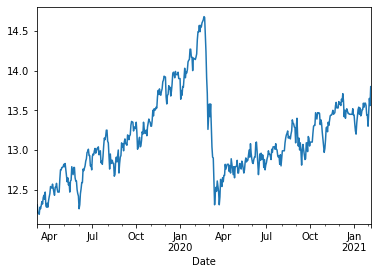

In [6]:
stocks_2y.iloc[:, 90].plot()

In [7]:
returns = stocks_2y.pct_change().iloc[1:]
returns.tail()

,Australian High Interest Cash,VanEck Vectors MSCI International Sustainable Equity,BetaShares Australian Equities Strong Bear Hedge,BetaShares Gold Bullion Currency Hedged,Vanguard Australian Shares,Betashares Active Australian Hybrids,Montgomery Global Equities Fund,iShares S&P/ASX Dividend Opportunities,VanEck Vectors FTSE Global Infrastructure,WCM Quality Global Growth,...,Tawasol Group Holding SA,Universal Auto Distributors Holding SA,Unimed SA,Atelier du Meuble Interieurs SA,Delta Corporation Limited,Innscor Africa Limited,OK Zimbabwe Limited,Econet Wireless Zimbabwe Limited,Padenga,Cassava SmarTech
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-02,0.0000,0.006711,-0.031509,-0.004530,0.014817,0.000000,0.026786,0.013564,0.008333,0.021305,...,0.000000,0.000000,-0.010753,0.000000,0.052632,0.162791,0.067857,-0.010638,0.075000,-0.081633
2021-02-03,0.0000,0.013333,-0.020548,-0.006257,0.008806,0.000975,0.008696,0.004461,0.009298,0.016949,...,0.000000,-0.295567,0.000000,-0.007752,0.053750,0.100000,0.023411,0.032258,0.037567,0.122222
2021-02-04,0.0000,-0.004257,0.020979,-0.012021,-0.008155,-0.000974,0.002874,-0.006662,-0.006141,0.000000,...,-0.055556,-0.027972,-0.027174,0.007812,0.067616,0.059091,0.091503,0.048611,0.036207,0.089109
2021-02-05,0.0002,0.015935,-0.027397,-0.012167,0.011349,-0.002924,0.014327,0.007452,0.008239,0.010256,...,-0.058824,0.057554,0.005587,-0.011628,0.066667,0.030043,0.062874,0.172185,0.098170,0.090909
2021-02-08,-0.0002,-0.003443,-0.012324,0.008211,0.005153,0.003910,-0.005650,0.005917,0.008172,-0.005076,...,0.050000,0.000000,-0.011111,0.011765,0.000000,-0.008333,0.047887,0.127119,0.006061,0.000000


In [8]:
cumulative = (1 + returns).cumprod()
cumulative = cumulative.fillna(method='ffill')

print('Total NaN: ', cumulative.isna().sum().sum())

cumulative.head()

Total NaN:  0


,Australian High Interest Cash,VanEck Vectors MSCI International Sustainable Equity,BetaShares Australian Equities Strong Bear Hedge,BetaShares Gold Bullion Currency Hedged,Vanguard Australian Shares,Betashares Active Australian Hybrids,Montgomery Global Equities Fund,iShares S&P/ASX Dividend Opportunities,VanEck Vectors FTSE Global Infrastructure,WCM Quality Global Growth,...,Tawasol Group Holding SA,Universal Auto Distributors Holding SA,Unimed SA,Atelier du Meuble Interieurs SA,Delta Corporation Limited,Innscor Africa Limited,OK Zimbabwe Limited,Econet Wireless Zimbabwe Limited,Padenga,Cassava SmarTech
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-06,0.9998,1.000000,0.983307,0.996956,1.007713,1.001009,1.005618,1.007246,1.000000,1.005848,...,1.000000,1.027397,0.996994,1.000000,1.000000,1.00000,0.961538,0.985816,1.000000,1.007143
2019-03-07,0.9998,0.996717,0.971383,0.999239,1.013276,1.003027,1.005618,1.014493,1.003943,1.005848,...,1.038462,1.027397,1.022044,0.970027,0.966543,1.00000,1.000000,0.957447,0.989796,1.014286
2019-03-08,0.9998,0.986398,0.993641,0.997717,1.003414,1.003027,0.994382,1.004348,1.004436,0.998051,...,1.038462,1.027397,1.012024,0.986376,0.910781,1.00000,0.965385,0.943262,1.000000,1.021429
2019-03-11,1.0002,0.984991,1.000000,1.007610,1.000379,1.002018,0.988764,0.997826,1.010350,1.000000,...,1.038462,1.020548,1.000000,0.975477,0.910781,0.93750,0.961538,0.921986,1.000000,1.000000
2019-03-12,1.0002,0.984991,1.002385,1.006849,0.999494,1.003027,0.994382,1.002899,1.016264,1.009747,...,1.000000,0.993151,0.992986,0.975477,0.929368,0.90625,0.961538,0.851064,0.918367,0.928571


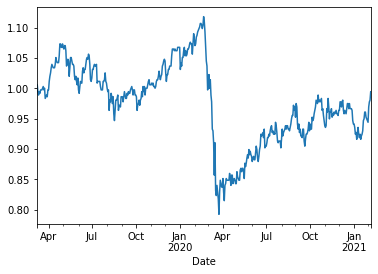

In [9]:
cumulative.iloc[:, 6].plot()

## GAN construction

In [10]:
from linear_gan import LinearGAN

In [11]:
linear_gan = LinearGAN(cumulative)

initializing generator
initializing discriminator


  0%|          | 0/1500 [00:00<?, ?it/s]

[Epoch 3500/5000] [Batch 0/143] [D loss: 0.105221] [G loss: -2.589921]


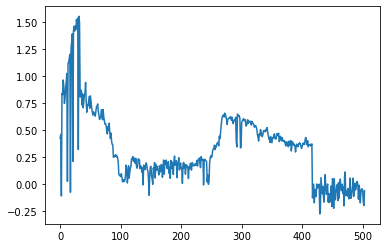

Saving model


  3%|▎         | 50/1500 [05:39<2:38:32,  6.56s/it]

[Epoch 3550/5000] [Batch 0/143] [D loss: -0.260927] [G loss: -2.212409]


  7%|▋         | 100/1500 [11:07<2:31:49,  6.51s/it]

[Epoch 3600/5000] [Batch 0/143] [D loss: -0.064941] [G loss: -3.959685]


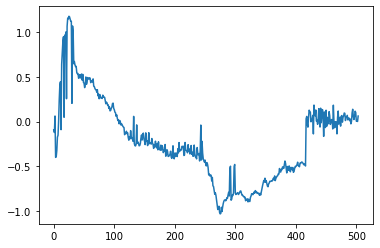

 10%|█         | 150/1500 [16:57<2:36:53,  6.97s/it]

[Epoch 3650/5000] [Batch 0/143] [D loss: 0.735999] [G loss: -2.915410]


 13%|█▎        | 200/1500 [22:53<2:30:17,  6.94s/it]

[Epoch 3700/5000] [Batch 0/143] [D loss: 0.094225] [G loss: -0.249538]


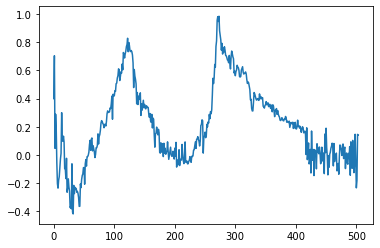

 17%|█▋        | 250/1500 [28:31<2:11:52,  6.33s/it]

[Epoch 3750/5000] [Batch 0/143] [D loss: -0.507579] [G loss: -0.796005]


 20%|██        | 300/1500 [34:41<2:48:45,  8.44s/it]

[Epoch 3800/5000] [Batch 0/143] [D loss: 0.294685] [G loss: -6.033325]


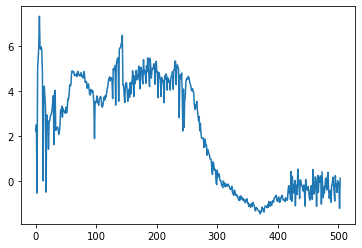

 23%|██▎       | 350/1500 [40:29<2:15:24,  7.06s/it]

[Epoch 3850/5000] [Batch 0/143] [D loss: -0.057903] [G loss: -0.943991]


 27%|██▋       | 400/1500 [46:13<1:59:59,  6.54s/it]

[Epoch 3900/5000] [Batch 0/143] [D loss: -1.263055] [G loss: -3.814999]


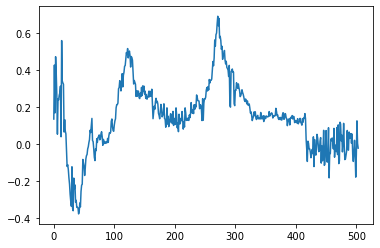

 30%|███       | 450/1500 [51:46<1:57:54,  6.74s/it]

[Epoch 3950/5000] [Batch 0/143] [D loss: -0.432836] [G loss: -5.919724]


 33%|███▎      | 500/1500 [57:40<2:27:37,  8.86s/it]

[Epoch 4000/5000] [Batch 0/143] [D loss: -0.438395] [G loss: 5.158770]


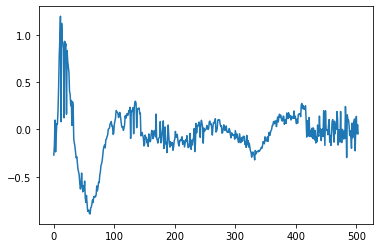

Saving model


 37%|███▋      | 550/1500 [1:04:58<2:43:06, 10.30s/it]

[Epoch 4050/5000] [Batch 0/143] [D loss: 0.305922] [G loss: -2.183831]


 40%|████      | 600/1500 [1:12:06<1:59:33,  7.97s/it]

[Epoch 4100/5000] [Batch 0/143] [D loss: -0.027714] [G loss: -5.693836]


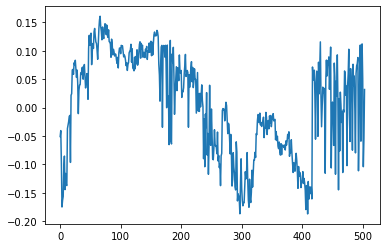

 43%|████▎     | 650/1500 [1:18:34<1:56:24,  8.22s/it]

[Epoch 4150/5000] [Batch 0/143] [D loss: 0.299976] [G loss: 1.622168]


 47%|████▋     | 700/1500 [1:24:18<1:25:35,  6.42s/it]

[Epoch 4200/5000] [Batch 0/143] [D loss: 1.120485] [G loss: 8.325422]


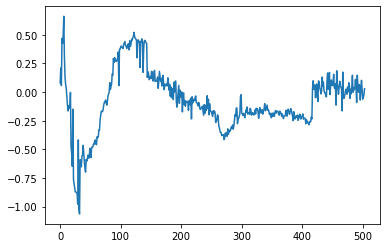

 50%|█████     | 750/1500 [1:29:56<1:22:02,  6.56s/it]

[Epoch 4250/5000] [Batch 0/143] [D loss: 5.838160] [G loss: -12.417992]


 53%|█████▎    | 800/1500 [1:35:27<1:15:02,  6.43s/it]

[Epoch 4300/5000] [Batch 0/143] [D loss: -0.184075] [G loss: -0.557046]


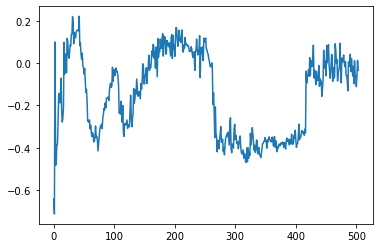

 57%|█████▋    | 850/1500 [1:40:50<1:10:03,  6.47s/it]

[Epoch 4350/5000] [Batch 0/143] [D loss: 0.062303] [G loss: -3.242514]


 60%|██████    | 900/1500 [1:46:05<1:05:45,  6.58s/it]

[Epoch 4400/5000] [Batch 0/143] [D loss: 0.167200] [G loss: -1.710856]


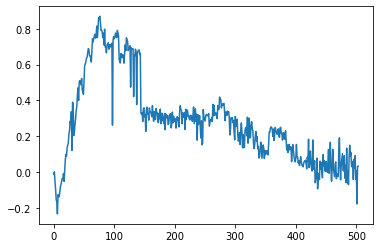

 63%|██████▎   | 950/1500 [1:51:39<59:54,  6.54s/it]  

[Epoch 4450/5000] [Batch 0/143] [D loss: 0.120479] [G loss: -0.046643]


 67%|██████▋   | 1000/1500 [1:56:54<51:54,  6.23s/it] 

[Epoch 4500/5000] [Batch 0/143] [D loss: -0.185762] [G loss: -1.563227]


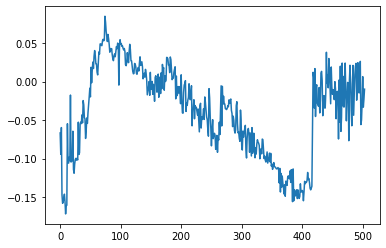

Saving model


 67%|██████▋   | 1003/1500 [1:57:19<58:08,  7.02s/it]


KeyboardInterrupt: 

In [12]:
linear_gan.train()